# <center> Topic 5 HW<center>
<center> Zander Bonnet <center>
 <center> 3/20/2024 <center>
     
References:
     
Cardiovascular Disease dataset. (2019). Kaggle [Dataset]. 
https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset/data.
     
     
COVID-19 in USA. (2021). Kaggle [Dataset]. 
https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-usa?select=us_covid19_daily.csv.
     
Rogel-Salazar, J. (2023). Statistics and Data Visualization with Python. CRC Press.
     
     
# Video : https://vimeo.com/925661752/efa69890a1?share=copy



In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import math
from sklearn.kernel_ridge import KernelRidge
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [5]:
data = pd.read_csv('/Users/zanderbonnet/Desktop/GCU/DSC_510/DataSets/cardio.csv', delimiter= ';')
#age in days
#height in cm
#weight in kg
#gender 1 = f, 2 = m
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
age = list(data['age'] / 365) # make age years
gender = [] #sets gender to strings
for gen in data['gender']:
    if gen == 1:
        gender.append("Male")
    elif gen == 2:
        gender.append("Female")
    else:
        gender.append('Missing')
height = list(data['height']) #get height
weight = list(data['weight']) #gets weight

hwa = pd.DataFrame({'Gender':gender,
                   'Age':age,
                   'Height':height,
                   'Weight':weight})
hwa.head()

,Gender,Age,Height,Weight
0,Female,50.391781,168,62.0
1,Male,55.419178,156,85.0
2,Male,51.663014,165,64.0
3,Female,48.282192,169,82.0
4,Male,47.873973,156,56.0


# 1. Hypothesis

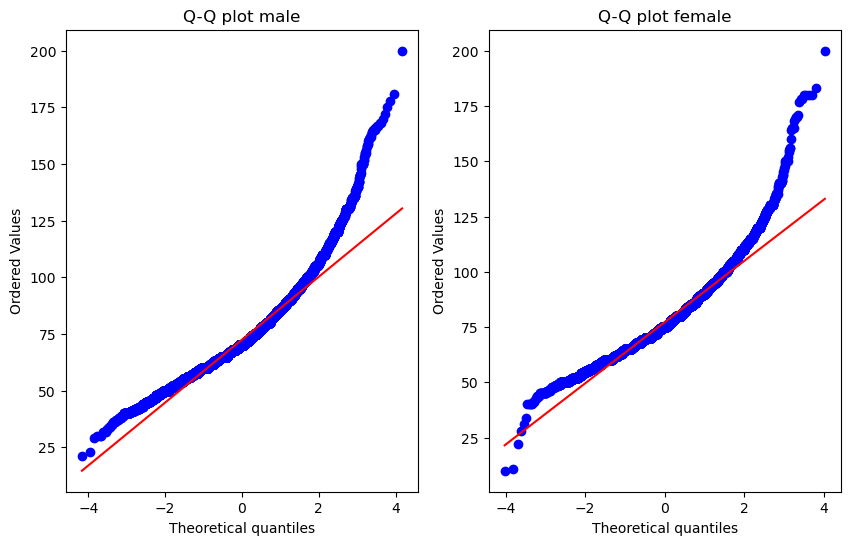

In [7]:
#checks normality of variables
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (10,6))
stats.probplot(hwa.loc[hwa['Gender'] == 'Male']['Weight'], dist = 'norm', plot = ax1)
ax1.title.set_text('Q-Q plot male')
stats.probplot(hwa.loc[hwa['Gender'] == 'Female']['Weight'], dist = 'norm', plot = ax2)
ax2.title.set_text('Q-Q plot female')
plt.show()

In [8]:
#calculates the statistic
mal = hwa.loc[hwa['Gender'] == 'Male']['Weight']
fem = hwa.loc[hwa['Gender'] == 'Female']['Weight']
tstat, pval = stats.ttest_ind(mal,fem)
if pval < .05: print(pval,'< 0.05: P-Value is Significant')
else: print(pval, '> 0.05: P-Value is Not Significant')
print(mal.mean(),fem.mean())

0.0 < 0.05: P-Value is Significant
72.5656050955414 77.257306906416


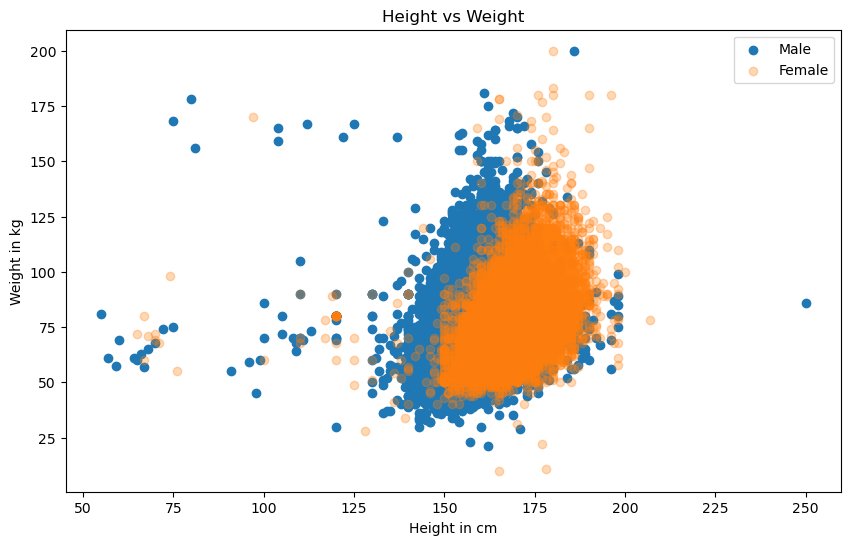

In [9]:
#Visualize the data
hei = hwa.loc[hwa['Gender'] == 'Male']['Height']
wei = hwa.loc[hwa['Gender'] == 'Male']['Weight']
plt.figure(figsize=(10,6))
plt.scatter(hei,wei, label = 'Male', )

hei = hwa.loc[hwa['Gender'] == 'Female']['Height']
wei = hwa.loc[hwa['Gender'] == 'Female']['Weight']
plt.scatter(hei,wei, label = 'Female', alpha = .3)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Height vs Weight')
plt.legend()
plt.show()

# 2. Correlation Coefficient

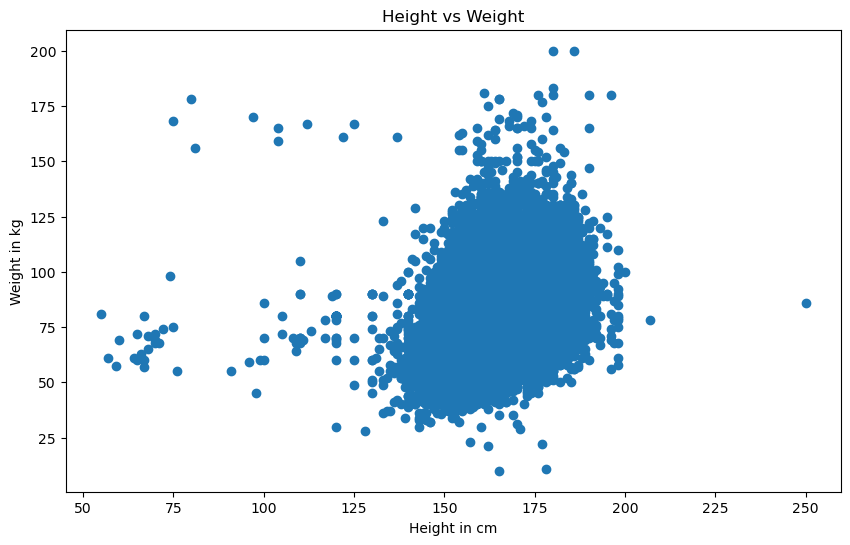

Correlation coefficent: 0.291
0.0 < 0.05: P-Value is Significant


In [10]:
hei = hwa['Height']
wei = hwa['Weight']
plt.figure(figsize=(10,6))
plt.scatter(hei,wei)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Height vs Weight')
plt.show()
cor, pval = stats.pearsonr(hei,wei) #calculates the coef
print('Correlation coefficent: {:.3f}'.format(cor))
if pval < .05: print(pval,'< 0.05: P-Value is Significant')
else: print(pval, '> 0.05: P-Value is Not Significant')

# 3. Linear Regression

In [11]:
results = smf.ols('Weight ~ Height', data = hwa).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     6474.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:25:23   Log-Likelihood:            -2.8291e+05
No. Observations:               70000   AIC:                         5.658e+05
Df Residuals:                   69998   BIC:                         5.659e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6483      1.043     -9.247      0.0

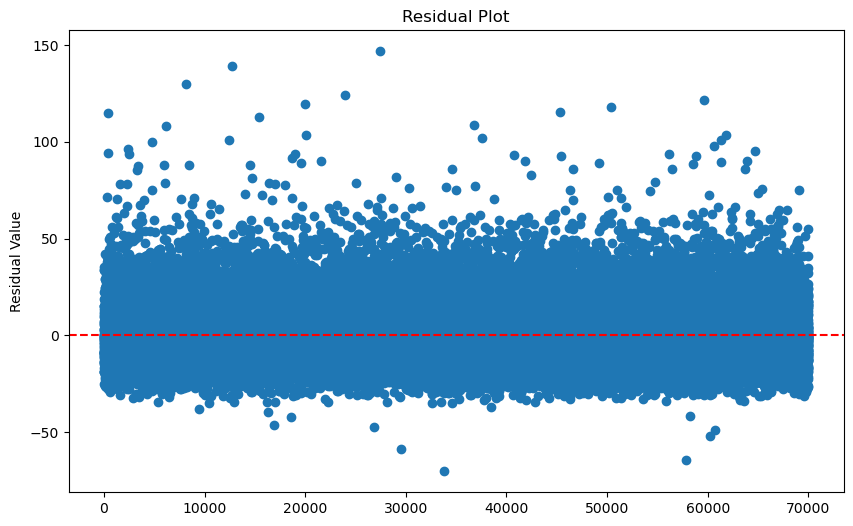

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(hwa.index,results.resid)
plt.axhline(0, linestyle = '--', color = 'red')
plt.title('Residual Plot')
plt.ylabel('Residual Value')
plt.show()

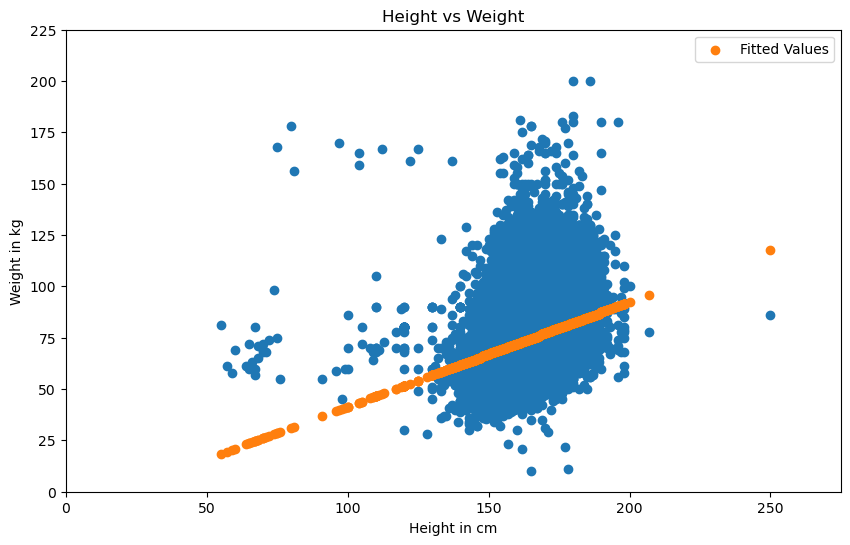

In [13]:
hei = hwa['Height']
wei = hwa['Weight']

plt.figure(figsize=(10,6))
plt.scatter(hei,wei)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Height vs Weight')
plt.xlim(0,275)
plt.ylim(0,225)

plt.scatter(hwa['Height'],results.fittedvalues, label = 'Fitted Values')
plt.legend()
plt.show()

In [14]:
#takes the log of the numerical variables
loghwa = hwa.copy()
loghwa['Age'] = loghwa['Age'].apply(math.log)
loghwa['Height'] = loghwa['Height'].apply(math.log)
loghwa['Weight'] = loghwa['Weight'].apply(math.log)

results1 = smf.ols('Weight ~ Height', data = loghwa).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     6857.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:25:24   Log-Likelihood:                 21256.
No. Observations:               70000   AIC:                        -4.251e+04
Df Residuals:                   69998   BIC:                        -4.249e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2136      0.066    -18.262      0.0

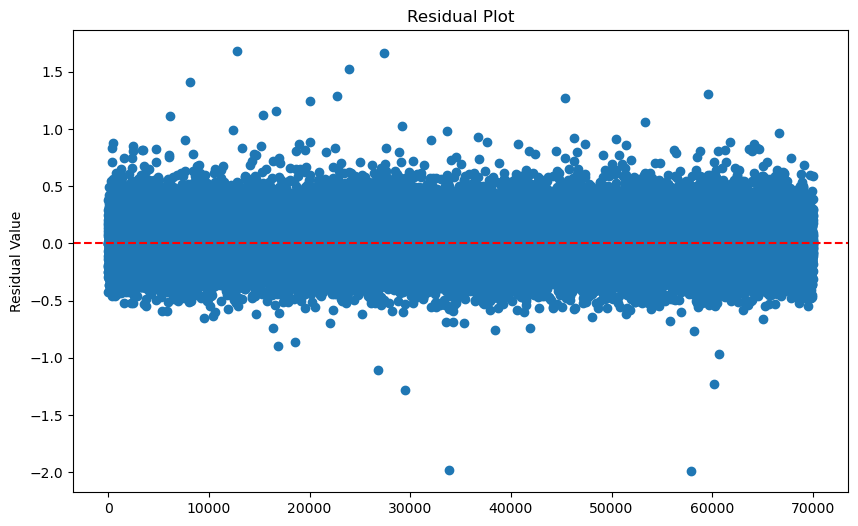

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(loghwa.index,results1.resid)
plt.axhline(0, linestyle = '--', color = 'red')
plt.title('Residual Plot')
plt.ylabel('Residual Value')
plt.show()

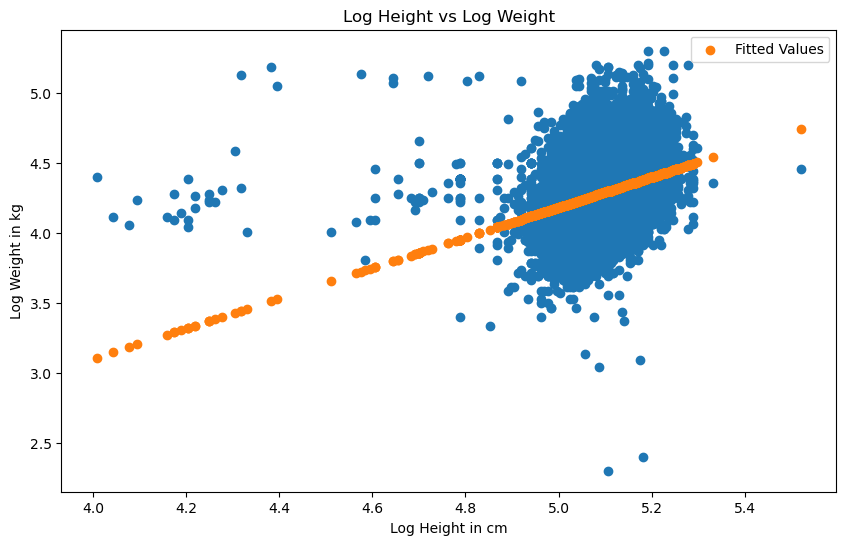

In [16]:
hei = loghwa['Height']
wei = loghwa['Weight']

plt.figure(figsize=(10,6))
plt.scatter(hei,wei)
plt.xlabel('Log Height in cm')
plt.ylabel('Log Weight in kg')
plt.title('Log Height vs Log Weight')
plt.scatter(loghwa['Height'],results1.fittedvalues, label = 'Fitted Values')
plt.legend()
plt.show()

# 4. Multiple Regression Model

In [17]:
results2 = smf.ols('Weight ~ Height + Age', data = hwa).fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     3491.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:25:24   Log-Likelihood:            -2.8268e+05
No. Observations:               70000   AIC:                         5.654e+05
Df Residuals:                   69997   BIC:                         5.654e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.3302      1.152    -17.646      0.0

In [18]:
X = hwa[['Height', 'Weight', 'Age']] 
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,Height,76.760870
1,Weight,30.186875
2,Age,52.074542


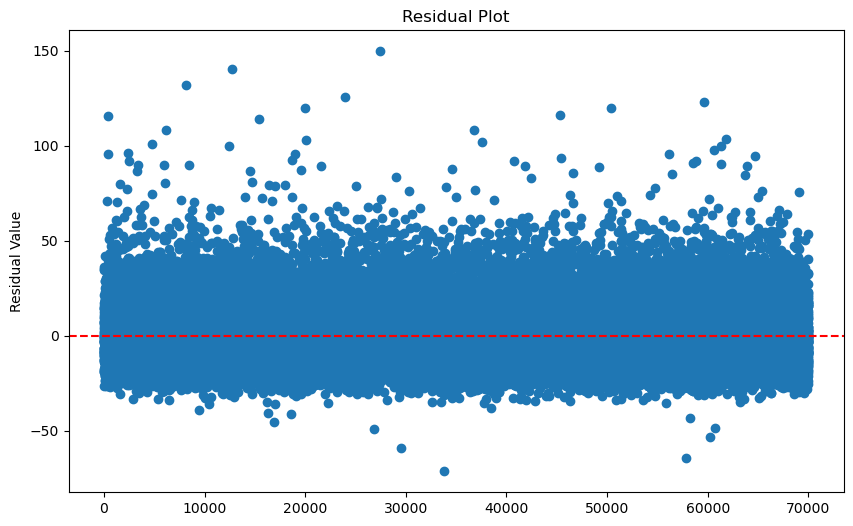

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(hwa.index,results2.resid)
plt.axhline(0, linestyle = '--', color = 'red')
plt.title('Residual Plot')
plt.ylabel('Residual Value')
plt.show()

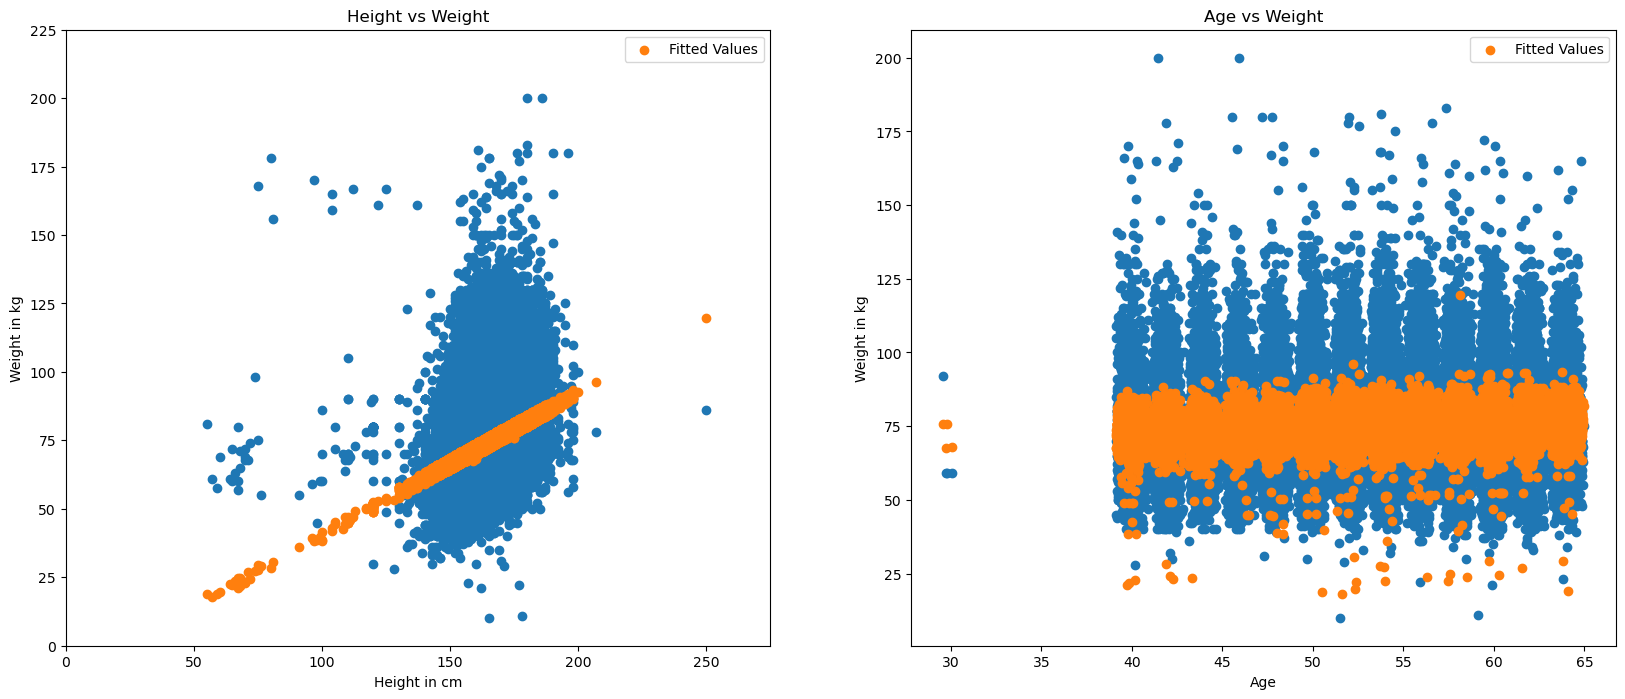

In [20]:
hei = hwa['Height']
wei = hwa['Weight']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.scatter(hei,wei)
ax1.set_xlabel('Height in cm')
ax1.set_ylabel('Weight in kg')
ax1.set_title('Height vs Weight')
ax1.set_xlim(0,275)
ax1.set_ylim(0,225)
ax1.scatter(hwa['Height'],results2.fittedvalues, label = 'Fitted Values')
ax1.legend()


ax2.scatter(hwa['Age'],wei)
ax2.set_xlabel('Age')
ax2.set_ylabel('Weight in kg')
ax2.set_title('Age vs Weight')
ax2.scatter(hwa['Age'],results2.fittedvalues, label = 'Fitted Values')
ax2.legend()
plt.show()

In [21]:
loghwa = hwa.copy()
loghwa['Age'] = loghwa['Age'].apply(math.log)
loghwa['Height'] = loghwa['Height'].apply(math.log)
loghwa['Weight'] = loghwa['Weight'].apply(math.log)

results3 = smf.ols('Weight ~ Height + Age', data = loghwa).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     3727.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        17:25:25   Log-Likelihood:                 21527.
No. Observations:               70000   AIC:                        -4.305e+04
Df Residuals:                   69997   BIC:                        -4.302e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8100      0.071    -25.504      0.0

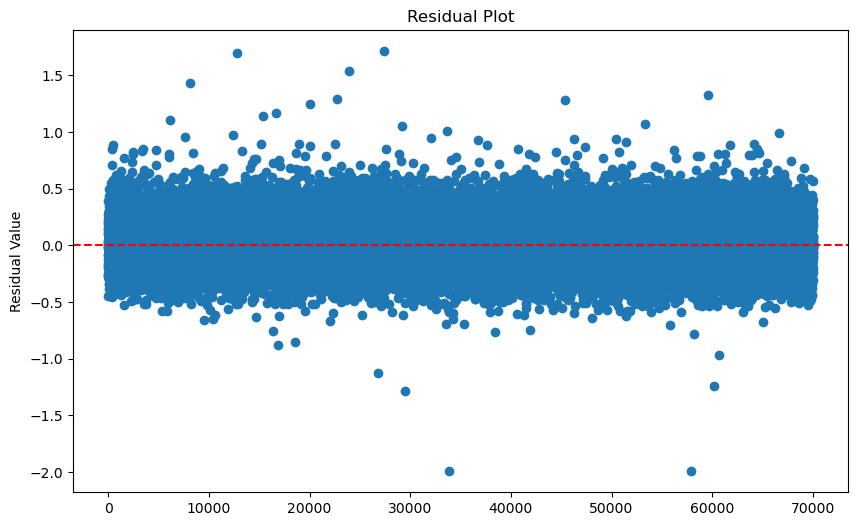

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(loghwa.index,results3.resid)
plt.axhline(0, linestyle = '--', color = 'red')
plt.title('Residual Plot')
plt.ylabel('Residual Value')
plt.show()

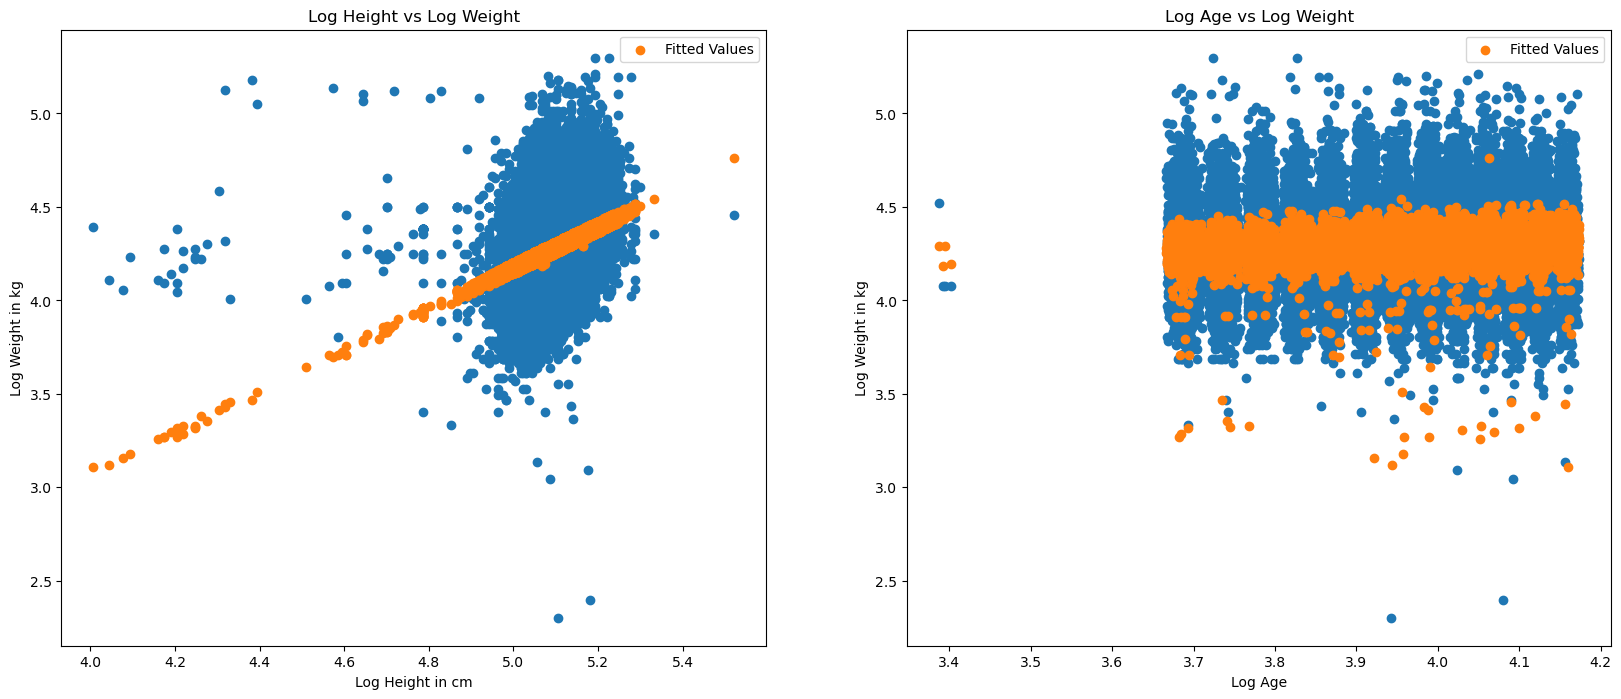

In [23]:
hei = loghwa['Height']
wei = loghwa['Weight']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.scatter(hei,wei)
ax1.set_xlabel('Log Height in cm')
ax1.set_ylabel('Log Weight in kg')
ax1.set_title('Log Height vs Log Weight')
ax1.scatter(loghwa['Height'],results3.fittedvalues, label = 'Fitted Values')
ax1.legend()


ax2.scatter(loghwa['Age'],wei)
ax2.set_xlabel('Log Age')
ax2.set_ylabel('Log Weight in kg')
ax2.set_title('Log Age vs Log Weight')
ax2.scatter(loghwa['Age'],results3.fittedvalues, label = 'Fitted Values')
ax2.legend()
plt.show()

# 5. Solutions

In [24]:
cov = pd.read_csv('/Users/zanderbonnet/Desktop/GCU/DSC_510/DataSets/covidUS/us_covid19_daily.csv')
cov = cov.sort_values(by = 'date', ignore_index=True)
cov['day'] = cov.index
cov = cov.fillna(0)
cov.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,day
0,20200122,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-22T24:00:00Z,0,0,0,0,0,0,0,e0caa1c66c4aa83baf227afe12261a1493fc0d7e,0
1,20200123,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-23T24:00:00Z,0,0,0,0,0,0,1,e0563aac8e1bc7b8b8059c52831b97179ff6f981,1
2,20200124,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-24T24:00:00Z,0,0,0,0,0,0,0,287531342bc8d5f2650b0cc12ebcca3807a64b7b,2
3,20200125,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-25T24:00:00Z,0,0,0,0,0,0,0,9ea5731f5b0a79617b994d6842eecfdbeb1dde35,3
4,20200126,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,2020-01-26T24:00:00Z,0,0,0,0,0,0,0,69c67c81e64d10a5270497fc5336779c06fb812b,4


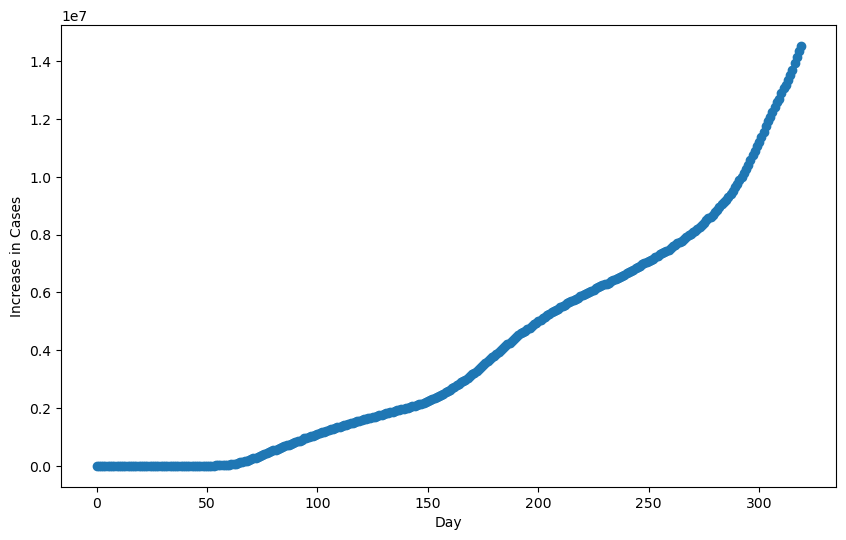

In [25]:
plt.figure(figsize = (10,6))
plt.scatter(cov['day'],cov['positive'])
plt.xlabel('Day')
plt.ylabel('Increase in Cases')
plt.show()

In [26]:
reg = smf.ols('positive ~ day', data = cov).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               positive   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     3146.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          5.93e-167
Time:                        17:25:26   Log-Likelihood:                -4922.8
No. Observations:                 320   AIC:                             9850.
Df Residuals:                     318   BIC:                             9857.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.341e+06    1.3e+05    -18.023      0.0

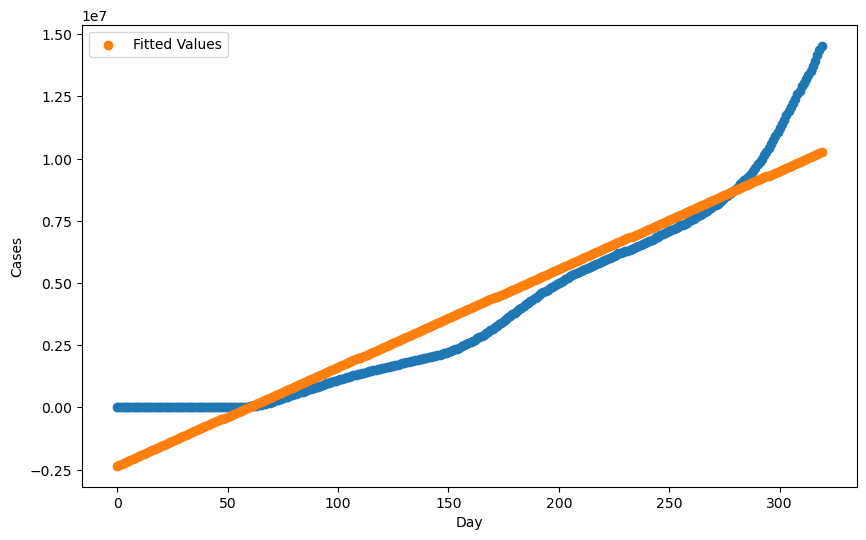

In [27]:
plt.figure(figsize = (10,6))
plt.scatter(cov['day'],cov['positive'])
plt.xlabel('Day')
plt.ylabel('Cases')

plt.scatter(cov['day'], reg.fittedvalues, label = 'Fitted Values')
plt.legend()
plt.show()

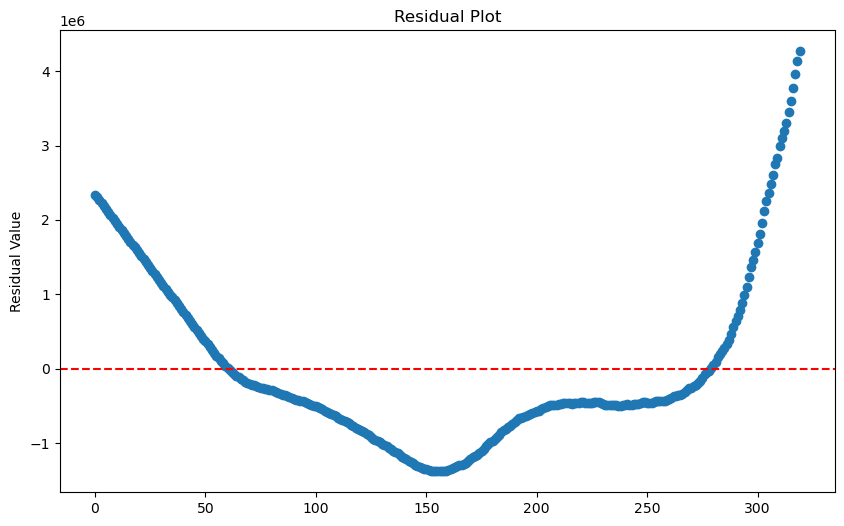

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(cov['day'],reg.resid)
plt.axhline(0, linestyle = '--', color = 'red')
plt.title('Residual Plot')
plt.ylabel('Residual Value')
plt.show()

In [29]:
logpos = []
for num in cov['positive']:
    logpos.append(math.sqrt(num))
cov['logPos'] = logpos
cov.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,day,logPos
0,20200122,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,e0caa1c66c4aa83baf227afe12261a1493fc0d7e,0,0.0
1,20200123,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,e0563aac8e1bc7b8b8059c52831b97179ff6f981,1,0.0
2,20200124,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,287531342bc8d5f2650b0cc12ebcca3807a64b7b,2,0.0
3,20200125,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,9ea5731f5b0a79617b994d6842eecfdbeb1dde35,3,0.0
4,20200126,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,69c67c81e64d10a5270497fc5336779c06fb812b,4,0.0


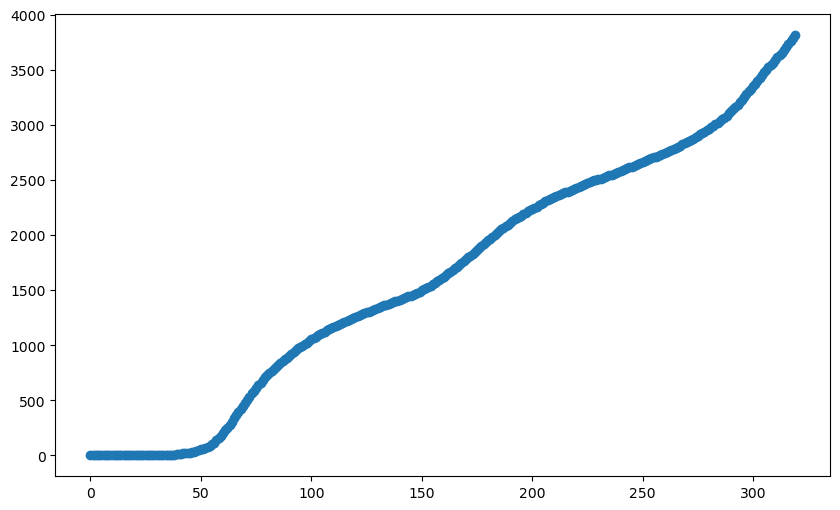

In [30]:
plt.figure(figsize = (10,6))
plt.scatter(cov['day'],cov['logPos'])
plt.show()

In [31]:
reg1 = smf.ols('logPos ~ day', data = cov).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                 logPos   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.863e+04
Date:                Mon, 07 Apr 2025   Prob (F-statistic):          1.35e-313
Time:                        17:25:27   Log-Likelihood:                -1979.7
No. Observations:                 320   AIC:                             3963.
Df Residuals:                     318   BIC:                             3971.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -283.5238     13.164    -21.538      0.0

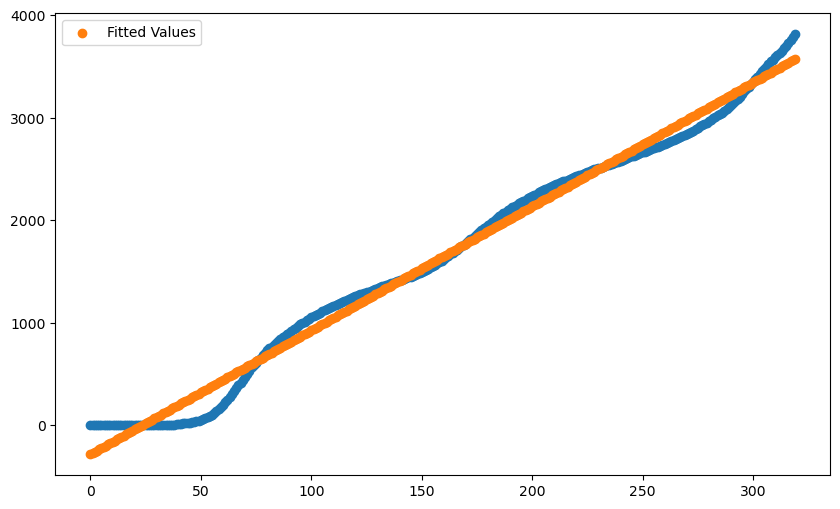

In [32]:
plt.figure(figsize = (10,6))
plt.scatter(cov['day'],cov['logPos'])

plt.scatter(cov['day'], reg1.fittedvalues, label = 'Fitted Values')
plt.legend()
plt.show()

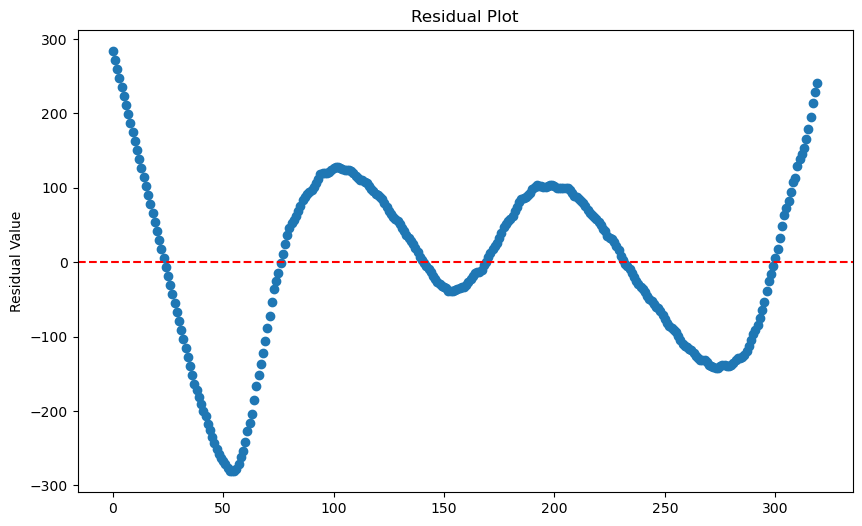

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(cov['day'],reg1.resid)
plt.axhline(0, linestyle = '--', color = 'red')
plt.title('Residual Plot')
plt.ylabel('Residual Value')
plt.show()

# 6. Non Linear Regression

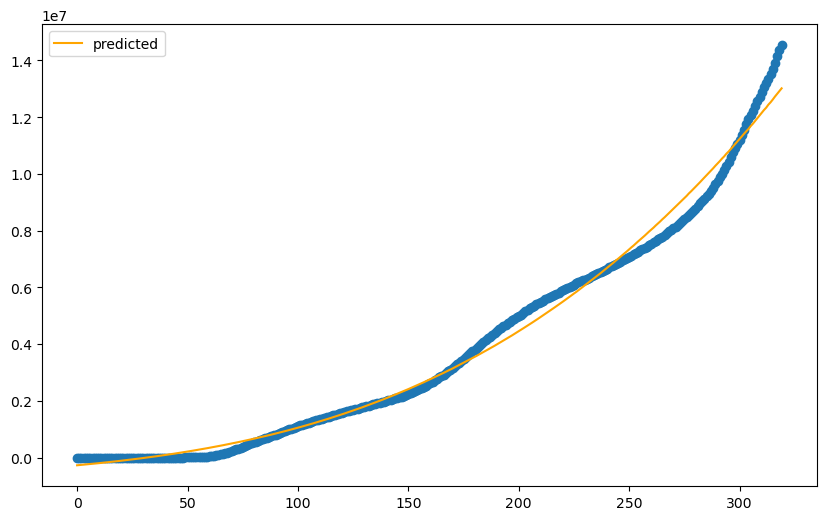

In [34]:
clf = KernelRidge(kernel='polynomial', gamma = .2)
d = np.array(cov['day']).reshape(-1,1)
clf.fit(d, cov['positive'])
pred = clf.predict(d)

plt.figure(figsize=(10,6))
plt.scatter(d,cov['positive'])
plt.plot(d,pred, label = 'predicted', color = 'orange')
plt.legend()
plt.show()

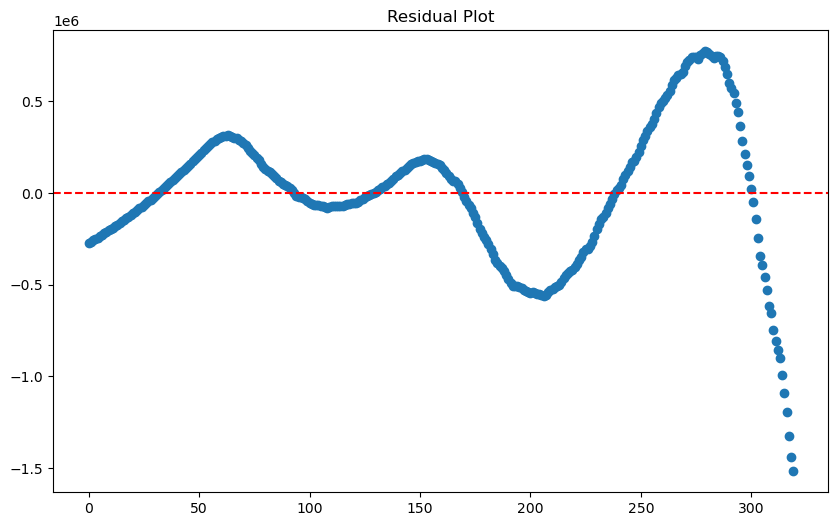

In [35]:
res = pred - cov['positive']
plt.figure(figsize=(10,6))
plt.scatter(cov['day'], res)
plt.axhline(0, linestyle = '--', color = 'red')
plt.title('Residual Plot')
plt.show()